# Data cleaning on the Cifar-10 Dataset using CleanVision.

When poking around for datasets a bit i noticed that some of the image datasets have some duplicates and some images that are poor quality and or to light or dark and as such should be removed. That is why i will begin this process with a bit of EDA. To do that i will need to display the images and inspect how many have these poor qualities. And for this step i will use a packet called CleanVision.

# Import the libraries

In [1]:
!pip install git+https://github.com/cleanlab/cleanvision.git
!pip install datasets

  Cloning https://github.com/cleanlab/cleanvision.git to c:\users\david\appdata\local\temp\pip-req-build-3x605kzz
  Resolved https://github.com/cleanlab/cleanvision.git to commit 1f9d26c97a5a54ec39a347496470648c43748139
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/cleanlab/cleanvision.git 'C:\Users\david\AppData\Local\Temp\pip-req-build-3x605kzz'


In [2]:
import os
import shutil
import pandas as pd
from datasets import load_dataset
from tqdm.notebook import tqdm
from cleanvision.imagelab import Imagelab

# Load the data and save it as PNG files

This might take a little while :) Took me about 2 min on my highend laptop.

In [3]:
# Path to store the cached dataset
dataset_cache_path = "cifar10_cache"

# Delete the existing dataset cache if it exists
if os.path.exists(dataset_cache_path):
    shutil.rmtree(dataset_cache_path)

# Load and cache the dataset
dataset = load_dataset('cifar10')
dataset.save_to_disk(dataset_cache_path)

train_dir = "cifar10png/train"
test_dir = "cifar10png/test"

get_class_name = dataset['train'].features['label'].int2str

# Copy the images to the train directory
for i in tqdm(range(len(dataset['train'])), desc="Copying train images"):
    class_name = get_class_name(dataset['train'][i]['label'])
    class_dir = os.path.join(train_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)  # Create class folder if it doesn't exist
    file_path = os.path.join(class_dir, f"train_{i}.png")
    if not os.path.exists(file_path):  # Check if the image already exists
        im = dataset['train'][i]['img'].save(file_path)

# Copy the images to the test directory
for i in tqdm(range(len(dataset['test'])), desc="Copying test images"):
    class_name = get_class_name(dataset['test'][i]['label'])
    class_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)  # Create class folder if it doesn't exist
    file_path = os.path.join(class_dir, f"test_{i}.png")
    if not os.path.exists(file_path):  # Check if the image already exists
        im = dataset['test'][i]['img'].save(file_path)

print("Dataset loaded and cached successfully.")

Found cached dataset cifar10 (C:/Users/david/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


  0%|          | 0/2 [00:00<?, ?it/s]

Saving the dataset (0/1 shards):   0%|          | 0/50000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Copying train images:   0%|          | 0/50000 [00:00<?, ?it/s]

Copying test images:   0%|          | 0/10000 [00:00<?, ?it/s]

Dataset loaded and cached successfully.


# Running CleanVision

In [4]:
imagelab= Imagelab(data_path="./cifar10png")

Reading images from C:\Users\david\cifar10png


Running the process of finding flawed images:

In [5]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

Issue checks completed. To see a detailed report of issues found, use imagelab.report().


Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | near_duplicates |           40 |
|  1 | dark            |           29 |
|  2 | light           |            3 |
|  3 | low_information |            1 | 


Top 4 sets of images with near_duplicates issue
Set: 0


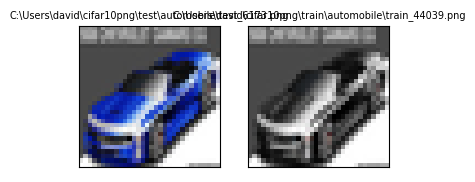

Set: 1


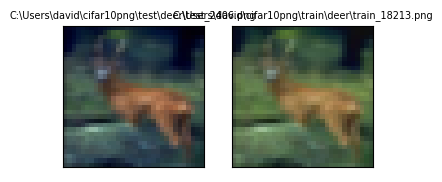

Set: 2


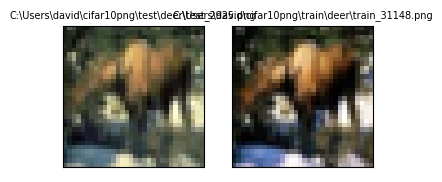

Set: 3


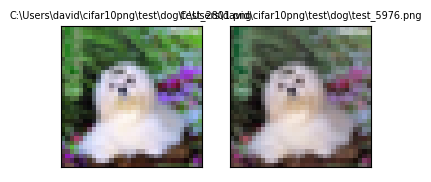


Top 4 examples with dark issue in the dataset.


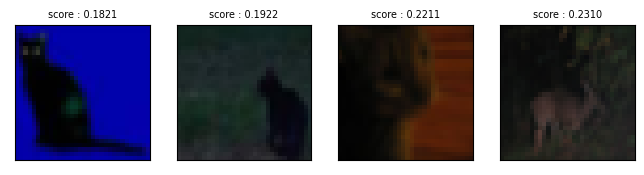

Found 3 examples with light issue in the dataset.


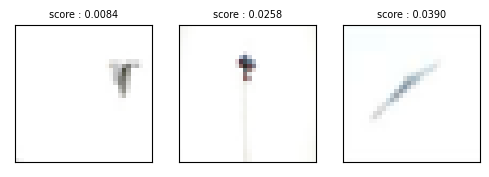

Found 1 example with low_information issue in the dataset.


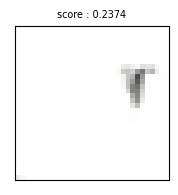

In [6]:
imagelab.report()

Here we can clearly see that there are infact some duplicates and some that are so close in resemblance that they are more or less the same photo. Have and apple and take a picture of it, dont move anything else and just switch out the apple for a really similar one and take a new photo. These photos are not gonna do anything but contribute to dataleaking and overfitting.

Lets look at some more data provided by the imagelab paket. We can specify that we want to see all of the issues with the images it has classified in some way using imagelab.issues.

In [7]:
imagelab.issues

,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,is_exact_duplicates_issue,is_near_duplicates_issue
C:\Users\david\cifar10png\test\airplane\test_10.png,1.0,False,0.715654,False,0.536786,False,1,False,0.815987,False,0.429291,False,False,False
C:\Users\david\cifar10png\test\airplane\test_1001.png,1.0,False,0.807909,False,0.890804,False,1,False,0.700727,False,0.443643,False,False,False
C:\Users\david\cifar10png\test\airplane\test_1010.png,1.0,False,0.728821,False,0.541385,False,1,False,0.828174,False,0.469040,False,False,False
C:\Users\david\cifar10png\test\airplane\test_1018.png,1.0,False,0.675271,False,0.581848,False,1,False,0.805273,False,0.392886,False,False,False
C:\Users\david\cifar10png\test\airplane\test_1022.png,1.0,False,0.757625,False,0.607843,False,1,False,0.890196,False,0.533907,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C:\Users\david\cifar10png\train\truck\train_9934.png,1.0,False,0.834427,False,0.782945,False,1,False,1.000000,False,0.588180,False,False,False
C:\Users\david\cifar10png\train\truck\train_9955.png,1.0,False,0.868609,False,0.791812,False,1,False,0.810393,False,0.510772,False,False,False
C:\Users\david\cifar10png\train\truck\train_998.png,1.0,False,0.880049,False,0.887374,False,1,False,0.988555,False,0.605363,False,False,False
C:\Users\david\cifar10png\train\truck\train_9984.png,1.0,False,0.911363,False,0.940628,False,1,False,0.870977,False,0.505376,False,False,False


In [8]:
imagelab.issue_summary

,issue_type,num_images
0,near_duplicates,40
1,dark,29
2,light,3
3,low_information,1
4,blurry,0
5,grayscale,0
6,odd_aspect_ratio,0
7,exact_duplicates,0


In [9]:
imagelab.info['near_duplicates']['num_sets']

20


Top 20 examples with dark issue in the dataset.


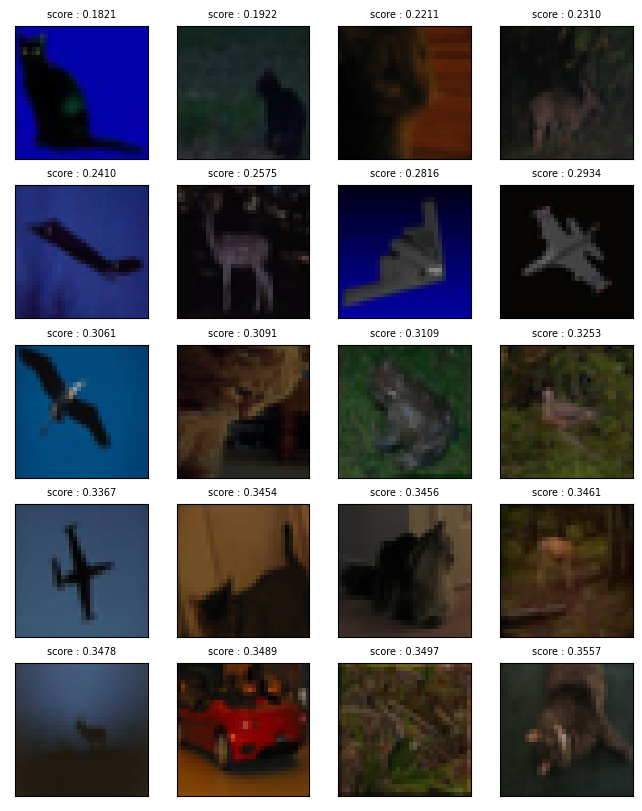

In [10]:
imagelab.visualize(issue_types=['dark'], num_images=20) #dark, near_duplicates, light, low_information

In [11]:
# Define the image types to remove
image_types_to_remove = ["near_duplicates", "dark", "light", "low_information"]

cleaned_dataset_dir = "cleaned_cifar10_dataset"  # Directory to store the cleaned dataset

# Check if cleaned_dataset_dir already exists
if not os.path.exists(cleaned_dataset_dir):
    os.makedirs(cleaned_dataset_dir)
else:
    print(f"Using existing directory: {cleaned_dataset_dir}")

# Get the list of bad image indices from the issue summary
bad_image_indices = []

for _, row in imagelab.issue_summary.iterrows():
    if row["issue_type"] in image_types_to_remove:
        num_images = row["num_images"]
        image_indices = range(num_images)
        bad_image_indices.extend(image_indices)

# Path to store the cached dataset
dataset_cache_path = "cifar10_cache"

# Delete the existing dataset cache if it exists
if os.path.exists(dataset_cache_path):
    shutil.rmtree(dataset_cache_path)

# Load and cache the dataset
dataset = load_dataset('cifar10')
dataset.save_to_disk(dataset_cache_path)

train_dir = os.path.join(cleaned_dataset_dir, "train")
test_dir = os.path.join(cleaned_dataset_dir, "test")

get_class_name = dataset['train'].features['label'].int2str

# Copy the images to the train directory
skipped_train_images = []
with tqdm(total=len(dataset['train']), desc="Copying train images", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}") as pbar:
    for i in range(len(dataset['train'])):
        if i in bad_image_indices:
            skipped_train_images.append(f"train_{i}.png")  # Add the skipped image name to the list
            pbar.update(1)
            continue
        class_name = get_class_name(dataset['train'][i]['label'])
        class_dir = os.path.join(train_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)  # Create class folder if it doesn't exist
        file_path = os.path.join(class_dir, f"train_{i}.png")
        if not os.path.exists(file_path):  # Check if the image already exists
            dataset['train'][i]['img'].save(file_path)
        pbar.update(1)

# Copy the images to the test directory
skipped_test_images = []
with tqdm(total=len(dataset['test']), desc="Copying test images", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}") as pbar:
    for i in range(len(dataset['test'])):
        if i in bad_image_indices:
            skipped_test_images.append(f"test_{i}.png")  # Add the skipped image name to the list
            pbar.update(1)
            continue
        class_name = get_class_name(dataset['test'][i]['label'])
        class_dir = os.path.join(test_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)  # Create class folder if it doesn't exist
        file_path = os.path.join(class_dir, f"test_{i}.png")
        if not os.path.exists(file_path):  # Check if the image already exists
            dataset['test'][i]['img'].save(file_path)
        pbar.update(1)

print("Dataset loaded, cleaned, and saved successfully.")
print("Skipped Train Images:", skipped_train_images)
print("Skipped Test Images:", skipped_test_images)
print("Total Skipped Images:", len(skipped_train_images) + len(skipped_test_images))

Using the latest cached version of the module from C:\Users\david\.cache\huggingface\modules\datasets_modules\datasets\cifar10\447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4 (last modified on Mon May 22 18:25:43 2023) since it couldn't be found locally at cifar10., or remotely on the Hugging Face Hub.
Found cached dataset cifar10 (C:/Users/david/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


Using existing directory: cleaned_cifar10_dataset


  0%|          | 0/2 [00:00<?, ?it/s]

Saving the dataset (0/1 shards):   0%|          | 0/50000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Copying train images:   0%|          | 0/50000

Copying test images:   0%|          | 0/10000

Dataset loaded, cleaned, and saved successfully.
Skipped Train Images: ['train_0.png', 'train_1.png', 'train_2.png', 'train_3.png', 'train_4.png', 'train_5.png', 'train_6.png', 'train_7.png', 'train_8.png', 'train_9.png', 'train_10.png', 'train_11.png', 'train_12.png', 'train_13.png', 'train_14.png', 'train_15.png', 'train_16.png', 'train_17.png', 'train_18.png', 'train_19.png', 'train_20.png', 'train_21.png', 'train_22.png', 'train_23.png', 'train_24.png', 'train_25.png', 'train_26.png', 'train_27.png', 'train_28.png', 'train_29.png', 'train_30.png', 'train_31.png', 'train_32.png', 'train_33.png', 'train_34.png', 'train_35.png', 'train_36.png', 'train_37.png', 'train_38.png', 'train_39.png']
Skipped Test Images: ['test_0.png', 'test_1.png', 'test_2.png', 'test_3.png', 'test_4.png', 'test_5.png', 'test_6.png', 'test_7.png', 'test_8.png', 'test_9.png', 'test_10.png', 'test_11.png', 'test_12.png', 'test_13.png', 'test_14.png', 'test_15.png', 'test_16.png', 'test_17.png', 'test_18.png', '

# End of Data Cleaning